In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg as LA

df = pd.read_csv('/data/pepper/combined.csv')
df = df[(df.pNum == 5) & (df.eNum == 1)]

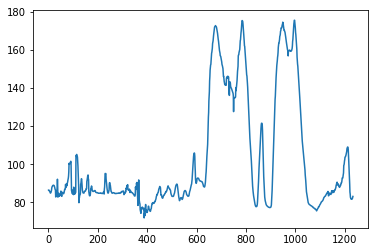

In [9]:

def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)


def angle_between(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2'::

            >>> angle_between((1, 0, 0), (0, 1, 0))
            1.5707963267948966
            >>> angle_between((1, 0, 0), (1, 0, 0))
            0.0
            >>> angle_between((1, 0, 0), (-1, 0, 0))
            3.141592653589793
    """
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos((np.dot(v1_u, v2_u)/np.dot(LA.norm(v2_u), LA.norm(v2_u))))


def xyz_from_frame(frame, jointName):
    jr = frame[frame.jointName == jointName]
    return np.array([float(jr.x), float(jr.y), float(jr.z)])


def arc_elbow(frame):
    
    spine_s = xyz_from_frame(frame, 'SpineShoulder')
    spine_m = xyz_from_frame(frame, 'SpineMid')
    shoulder_l = xyz_from_frame(frame, 'ShoulderLeft')
    elbow_l = xyz_from_frame(frame, 'ElbowLeft')
    
    subtraction = np.subtract(spine_s, shoulder_l)
    s_paralel = np.add(spine_m, subtraction)
    
    elbow_v = tuple(np.subtract(elbow_l, shoulder_l))
    paralel_v = tuple(np.subtract(s_paralel, shoulder_l))
    
    a_1_u = unit_vector(elbow_v)
    b_1_u = unit_vector(paralel_v)

    a = np.rad2deg(angle_between(a_1_u, b_1_u))
    return a

gb = df.groupby('frameNum')    
frame_array = [gb.get_group(x) for x in gb.groups]

frame_num = 1
x = []
y = []
for frame in frame_array:
    x.append(arc_elbow(frame))
    y.append(frame_num)
    frame_num += 1

plt.plot(y, x)


plt.show()